Text(0.5, 1.0, 'Scatter Plot')

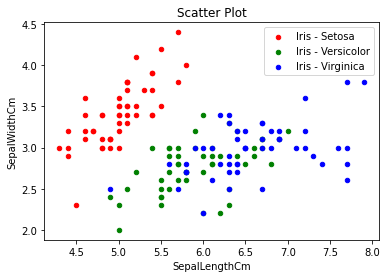

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder # convert labels to numbers


ds = pd.read_csv('iris.csv')
ax = ds[ds.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='Iris - Setosa')
ds[ds.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='Iris - Versicolor', ax=ax)
ds[ds.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")

In [3]:
encoder = LabelEncoder()
ds['Species'] = encoder.fit_transform(ds['Species'])

In [4]:
ds= ds.drop(['Id'], axis = 1)

In [5]:
data = ds.values 

X=data [:, 0:5] # features
Y= data [: , -1] # labels

print(X.shape) # 150 samples, 4 features
print(Y.shape) # 150 samples, 4 features


(150, 5)
(150,)


In [21]:
#train-test split = 3:1 

train_x = X[: 112, ] # 125 samples, 4 features
train_y = Y[:112, ] # 125 samples, 1 feature

test_x = X[112:, ] # 25 samples, 4 features
test_y = Y[112:, ] # 25 samples, 1 feature

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(112, 5)
(112,)
(38, 5)
(38,)


In [22]:
### Confusion Matrix

### Momentum K-means

In [34]:
import numpy as np

class StochasticKMeans:
    def __init__(self, n_clusters=8, max_iter=300, random_state=11):
        self.n_clusters = n_clusters 
        self.max_iter = max_iter 
        self.random_state = random_state # random seed
    
    def fit(self, train_x, train_y):
        # Initialize centroids randomly
        np.random.seed(self.random_state)
        n_samples, n_features = train_x.shape # number of samples and number of features
        self.centroids = train_x[np.random.choice(n_samples, self.n_clusters, replace=False)] # random centroids
        
        for i in range(self.max_iter):
            # Assign samples to closest centroids (cluster labels)
            distances = np.sqrt(((train_x[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
            self.labels = np.argmin(distances, axis=1) # cluster label of each sample
            
            # Update centroids
            for j in range(n_samples):
                # Select a random sample
                sample_idx = np.random.randint(n_samples) # random index
                sample = train_x[sample_idx] # random sample will be used to update the centroid of the cluster to which it belongs
                label = self.labels[sample_idx] # cluster label of the random sample 
                
                # Update the centroid of the cluster to which the sample belongs
                self.centroids[label] = (self.centroids[label] * (i * n_samples + j) + sample) / (i * n_samples + j + 1) # i * n_samples + j = number of samples seen so far
                # Update using learning rate
                # self.centroids[label] = self.centroids[label] + 0.1 * (sample - self.centroids[label])
                
    def predict(self, X):
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
        return np.argmin(distances, axis=1)

In [35]:
# K-means clustering
clus = StochasticKMeans(3)
clus.fit(train_x, train_y)

In [36]:
y_pred = clus.predict(test_x) # predict the cluster for a given point


In [37]:
# make predictions on training data
test_labels = clus.predict(train_x)

In [38]:
from sklearn.metrics import accuracy_score
#training accuracy
print("Training Accuracy: ", accuracy_score(train_y, test_labels)*100)

#testing accuracy
print("Testing Accuracy: ", accuracy_score(test_y, y_pred)*100)

Training Accuracy:  83.03571428571429
Testing Accuracy:  100.0


In [33]:
# test_labels
train_y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [39]:
from sklearn.metrics import classification_report

#classification report for training set 
print(classification_report(train_y, test_labels))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       0.97      0.64      0.77        50
         2.0       0.38      0.92      0.54        12

    accuracy                           0.83       112
   macro avg       0.78      0.85      0.77       112
weighted avg       0.92      0.83      0.85       112

